# More Distributions and the Central Limit Theorem

## The normal distribution

### The normal distribution

The normal distribution is one of the most important probability distributions, since many statistical methods rely on it and countless real-world situations can be modeled with it. Its shape is commonly refered as "bell curve" and it's symmetrical. 

As with any continuous distributions, the area beneath the normal distribution curve is equal to $1$. This curve never hits $0$.

The normal distribution is described by its mean and its standard deviation.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

amir_deals = pd.read_csv('./data/amir_deals.csv', index_col=0)

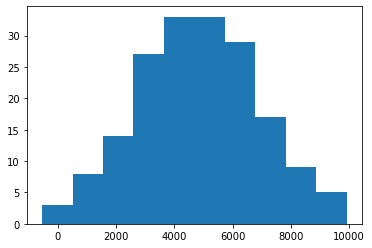

In [15]:
# Create a histogram with 10 bins to visualize the distribution of the amount columm of amir_deals
plt.hist(amir_deals['amount'])
plt.show()

#### The standard normal distribution

A normal distribution with mean equals to $0$ and standard deviation equals to $1$ is called a standard normal distribution. 

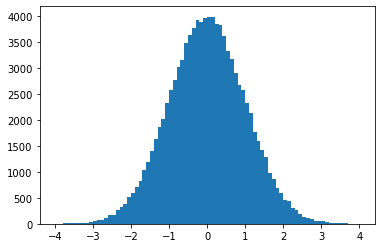

In [16]:
normal_dist_values = np.random.normal(0, 1, size=100000)
plt.hist(normal_dist_values, bins=np.arange(-4, 4.1, 0.1))
plt.show()

#### Areas under the normal distribution

For the normal distribution:

* $68\%$ of the area is within $1$ standard deviation of the mean,
* $95\%$ of the area falls within $2$ standard deviations of the mean,
* and $97.5\%$ of the area is within $3$ standard deviations of the mean.

### Probabilities from a normal distribution

Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the `amount` column of `amir_deals` and follow a normal distribution with a mean of 5000 dollars and a standard deviation of 2000 dollars.

In [17]:
# What's the probability of Amir closing a deal worth less than $7500?
from scipy.stats import norm
prob_less_7500 = norm.cdf(7500, 5000, 2000)
prob_less_7500

0.8943502263331446

In [18]:
# What's the probability of Amir closing a deal worth more than $1000
prob_over_1000 = 1 - norm.cdf(1000, 5000, 2000)
prob_over_1000

0.9772498680518208

In [19]:
# What's the probability of Amir closing a deal worth between $3000 and $7000?
prob_3000_to_7000 = norm.cdf(7000, 5000, 2000) - norm.cdf(3000, 5000, 2000)
prob_3000_to_7000

0.6826894921370859

In [20]:
# What amount will 25% of Amir's sales be less than?
pct_25 = norm.ppf(0.25, 5000, 2000)
pct_25

3651.0204996078364

### Simulate values from a normal distribution

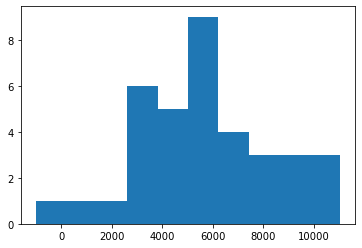

In [21]:
# Currently, Amir's average sale amount is $5000 
# Calculate what his new average amount will be if it increases by 20% and store this in new_mean
new_mean = 5000 + (5000 * 0.2)

# Amir's current standard deviation is $2000
# Calculate what his new standard deviation will be if it increases by 30% and store this in new_sd
new_sd = 2000 + (2000 * 0.3)

# Create a variable called new_sales, which contains 36 simulated amounts from a normal distribution with a mean of new_mean and a standard deviation of new_sd
new_sales = norm.rvs(new_mean, new_sd, 36)

# Plot the distribution of the new_sales amounts using a histogram and show the plot
plt.hist(new_sales)
plt.show()

## The central limit theorem

### Sampling distribution

We can take a random sample from the results of an experiment and then calculate a summary statistic for this sample. If we repeat this proces many times, then we can calculate and plot the probability distribution of the values of the sample summary statistic. 

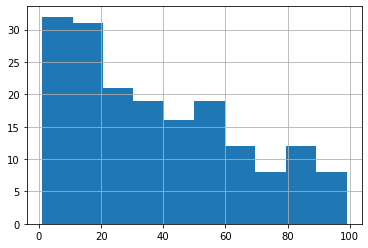

In [22]:
# Create a histogram of the num_users column of amir_deals and show the plot
amir_deals['num_users'].hist()
plt.show()

In [24]:
# Set the seed to 104
# Take a sample of size 20 with replacement from the num_users column of amir_deals, and take the mean
np.random.seed(104)
amir_deals.num_users.sample(20, replace=True).mean()

32.0

In [27]:
# Repeat the above process 100 times using a for loop and store as sample_means
np.random.seed(104)
sample_means = []
for i in range(100):
    sample_means.append(amir_deals.num_users.sample(20, replace=True).mean())

### The central limit theorem (CLT)

The central limit theorem states that a sampling distribution of a sample statistic approaches the normal distribution as you take more samples, no matter the original distribution being sampled from.

For the central limit theorem to apply, the taken samples should be random and independent.

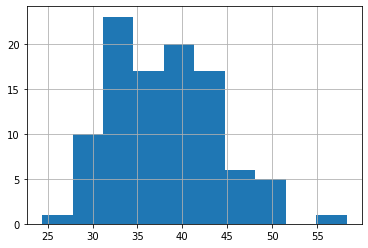

In [31]:
# Convert sample_means into a pd.Series 
# Create a histogram of the sample_means, and show the plot
sample_means = pd.Series(sample_means)
sample_means.hist()
plt.show()

### Inferring characteristics for the entire population 

The central limit theorem comes in handy when you have a huge population and don't have the time or resources to collect data on everyone. Instead, you can collect several smaller samples and create a sampling distribution, then to estimate summary statistics as mean or standard deviation for your entire population.

## The Poisson distribution

## More probability distributions